In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset 
df = pd.read_csv('Merged_Unique_Names_V2.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7821 entries, 0 to 7820
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seqn            7821 non-null   int64  
 1   first           7821 non-null   object 
 2   last            7821 non-null   object 
 3   gender          7821 non-null   int64  
 4   age             7785 non-null   float64
 5   race            7821 non-null   int64  
 6   education       5315 non-null   float64
 7   marital         5315 non-null   float64
 8   income          7066 non-null   float64
 9   household_size  7821 non-null   int64  
 10  insurance       7821 non-null   int64  
 11  private_insur   3650 non-null   float64
 12  medicare        1123 non-null   float64
 13  medicaid        1378 non-null   float64
 14  military_insur  154 non-null    float64
 15  no_insurance    2 non-null      float64
 16  gen_health      5892 non-null   float64
 17  fam_savings     3596 non-null   f

In [21]:
df.describe()

,seqn,gender,age,race,education,marital,income,household_size,insurance,private_insur,...,s_cotinine,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio
count,7821.000000,7821.000000,7785.000000,7821.000000,5315.000000,5315.000000,7066.000000,7821.000000,7821.000000,3650.000000,...,7018.000000,6145.00000,3033.000000,2881.000000,6989.000000,2942.000000,7064.000000,6652.000000,6652.000000,6652.000000
mean,67036.935686,0.501087,36.770199,3.467332,3.470555,2.656444,8.041608,3.614883,1.211098,1.020822,...,38.760167,5.70275,105.753379,14.213343,52.625554,109.496941,62.586934,3502.013830,2836.134847,0.815163
std,2813.920199,0.500031,22.602984,1.570056,1.270236,1.872923,4.499583,1.707289,0.510062,1.257961,...,105.414991,1.06488,32.873456,17.006014,13.918712,35.172463,25.255666,1197.271793,971.965071,0.087071
min,62161.000000,0.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.011000,3.60000,39.000000,0.140000,14.000000,9.000000,11.400000,592.000000,409.000000,0.313041
25%,64599.000000,0.000000,16.000000,3.000000,3.000000,1.000000,5.000000,2.000000,1.000000,1.000000,...,0.011000,5.20000,91.000000,6.810000,43.000000,84.000000,44.700000,2631.000000,2105.750000,0.765642
50%,67042.000000,1.000000,34.000000,3.000000,4.000000,2.000000,7.000000,4.000000,1.000000,1.000000,...,0.037000,5.50000,98.000000,10.630000,51.000000,106.000000,59.600000,3442.500000,2790.000000,0.822748
75%,69465.000000,1.000000,56.000000,4.000000,5.000000,5.000000,14.000000,5.000000,1.000000,1.000000,...,0.689500,5.80000,107.000000,17.080000,60.000000,131.000000,80.300000,4314.250000,3486.250000,0.872915
max,71916.000000,1.000000,80.000000,7.000000,5.000000,6.000000,15.000000,7.000000,9.000000,77.000000,...,1700.000000,17.80000,382.000000,647.500000,175.000000,331.000000,169.600000,7863.000000,6923.000000,1.000000


In [23]:
df.head()

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,s_cotinine,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio
0,62632,Samual,Sipes,0,29.0,6,2.0,5.0,5.0,3,...,159.000,6.4,122.0,106.48,30.0,151.0,100.3,5426.0,4434.0,0.817177
1,63150,Beau,Dach,0,19.0,3,NaN,NaN,15.0,4,...,14.700,5.0,NaN,NaN,46.0,NaN,124.4,7175.0,5786.0,0.806411
2,71366,Youlanda,Metz,1,20.0,3,4.0,5.0,3.0,3,...,0.011,5.0,NaN,NaN,58.0,NaN,65.3,5120.0,4570.0,0.892578
3,63734,Deandre,Walsh,0,43.0,7,4.0,3.0,2.0,1,...,0.766,6.7,NaN,NaN,38.0,NaN,94.3,NaN,NaN,NaN
4,65619,Rhett,Douglas,0,20.0,1,3.0,5.0,8.0,2,...,0.376,5.3,NaN,NaN,43.0,NaN,54.1,3870.0,3297.0,0.851938


In [25]:
df.tail()

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,s_cotinine,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio
7816,71915,Nathanael,Bashirian,0,60.0,3,5.0,5.0,10.0,1,...,0.027,5.2,91.0,7.46,36.0,110.0,55.5,4585.0,3174.0,0.692257
7817,65077,Lazaro,Mitchell,0,60.0,2,5.0,1.0,NaN,2,...,0.020,5.6,107.0,9.13,51.0,118.0,80.4,NaN,NaN,NaN
7818,65184,Denice,Jones,1,50.0,6,1.0,1.0,NaN,4,...,0.017,5.3,NaN,NaN,62.0,NaN,57.0,3277.0,2489.0,0.759536
7819,69058,Tanner,Towne,0,43.0,1,1.0,6.0,5.0,5,...,33.900,5.5,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN
7820,69292,Jamar,Padberg,0,12.0,3,NaN,NaN,7.0,4,...,0.018,5.0,NaN,NaN,44.0,NaN,35.8,3047.0,2523.0,0.828028


In [27]:
df.shape

(7821, 77)

In [29]:
# List of columns to drop that are not directly related to diabetes prediction
columns_to_drop = [    'seqn', 'first', 'last', 'income', 'household_size', 'insurance', 'private_insur',
    'medicare', 'medicaid', 'military_insur', 'no_insurance', 'gen_health', 'fam_savings', 
    'memory', 'days_active', 'waist_cm', 'pulse', 'drugs', 'grip_strength', 'fvc', 'fev1', 'fev1_fvc_ratio',
    'alb_cr_ratio', 'alb', 'alt', 'ast', 'alk_phos', 'bun', 'ca', 'cpk', 'cr', 'iron', 'phos', 
    't_protein', 'u_acid', 'sodium', 'potassium', 'chloride', 'glob', 'trigs', 'wbc', 'hgb', 'hct', 
    'platelets', 's_cotinine', 'bicarb', 'education', 'marital']

# Drop the specified columns
data = df.drop(columns=columns_to_drop)

# Verify the changes
print(data.head())

   gender   age  race  asthma  chf  cad   mi  cva  copd  cancer  ...  dia_bp  \
0       0  29.0     6     2.0  2.0  2.0  2.0  2.0   2.0     2.0  ...    80.0   
1       0  19.0     3     1.0  NaN  NaN  NaN  NaN   NaN     NaN  ...    68.0   
2       1  20.0     3     2.0  2.0  2.0  2.0  2.0   2.0     2.0  ...    54.0   
3       0  43.0     7     2.0  2.0  1.0  1.0  2.0   2.0     2.0  ...    66.0   
4       0  20.0     1     2.0  2.0  2.0  2.0  1.0   2.0     2.0  ...    64.0   

   t_chol  glucose    ldh  t_bilirubin  a1c  glucose.1  insulin   hdl  \
0   215.0    118.0  170.0          0.8  6.4      122.0   106.48  30.0   
1   180.0     93.0  102.0          0.8  5.0        NaN      NaN  46.0   
2   164.0     71.0  142.0          0.7  5.0        NaN      NaN  58.0   
3   195.0    225.0  109.0          0.7  6.7        NaN      NaN  38.0   
4   187.0     90.0  123.0          0.5  5.3        NaN      NaN  43.0   

   ldl_chol  
0     151.0  
1       NaN  
2       NaN  
3       NaN  
4       Na

In [31]:
data.shape

(7821, 29)

In [33]:
#Missing value

data.isnull().sum()

gender             0
age               36
race               0
asthma             5
chf             2517
cad             2522
mi              2508
cva             2506
copd            2511
cancer          2507
diabetes           5
depression      2877
hypertension    1912
smoker          2507
drinks_day      4492
weight_kg         89
height_cm         89
bmi              102
sys_bp          1065
dia_bp          1065
t_chol          1847
glucose         1845
ldh             1852
t_bilirubin     1852
a1c             1676
glucose.1       4788
insulin         4940
hdl              832
ldl_chol        4879
dtype: int64

In [35]:
#duplicates
data.duplicated().sum()

0

In [37]:
# Z-score method for detecting outliers
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)  # Values greater than 3 are considered outliers
print(outliers)

gender          0
age             0
race            0
asthma          0
chf             0
cad             0
mi              0
cva             0
copd            0
cancer          0
diabetes        0
depression      0
hypertension    0
smoker          0
drinks_day      0
weight_kg       0
height_cm       0
bmi             0
sys_bp          0
dia_bp          0
t_chol          0
glucose         0
ldh             0
t_bilirubin     0
a1c             0
glucose.1       0
insulin         0
hdl             0
ldl_chol        0
dtype: int64


In [39]:
#Encoding

data['asthma'] = data['asthma'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['chf'] = data['chf'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['cad'] = data['cad'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['mi'] = data['mi'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['cva'] = data['cva'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['copd'] = data['copd'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['cancer'] = data['cancer'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['depression'] = data['depression'].replace({0: 'No', 1: 'Mild', 2: 'Moderate', 3: 'Severe', np.nan: 'Unknown'})
data['hypertension'] = data['hypertension'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})
data['smoker'] = data['smoker'].replace({1: 'Yes', 2: 'No', np.nan: 'Unknown'})


In [41]:
data['diabetes'] = data['diabetes'].replace({1: 'Type 1', 2: 'Type 2', 3: 'Gestational', np.nan: 'Unknown'})

In [43]:
# Skewness for numerical columns
data.select_dtypes(include=[np.number]).skew()


gender         -0.004348
age             0.326620
race            0.406260
drinks_day      8.782415
weight_kg       0.438957
height_cm      -0.895533
bmi             1.019566
sys_bp          1.109873
dia_bp         -1.007488
t_chol          0.689466
glucose         4.863064
ldh             1.781670
t_bilirubin     2.289303
a1c             3.969609
glucose.1       4.082101
insulin        19.399106
hdl             1.036659
ldl_chol        0.644864
dtype: float64

In [45]:
# Apply log(1+x) transformation to highly skewed variables
skewed_columns = ['drinks_day', 'glucose', 'insulin', 'a1c', 'glucose.1']
for col in skewed_columns:
    data[col] = np.log1p(df[col])

In [47]:
# Check skewness after transformation
transformed_skewness = data.select_dtypes(include=[np.number]).skew()
print(transformed_skewness)

gender        -0.004348
age            0.326620
race           0.406260
drinks_day     1.057892
weight_kg      0.438957
height_cm     -0.895533
bmi            1.019566
sys_bp         1.109873
dia_bp        -1.007488
t_chol         0.689466
glucose        2.274676
ldh            1.781670
t_bilirubin    2.289303
a1c            2.672251
glucose.1      2.399988
insulin        0.398040
hdl            1.036659
ldl_chol       0.644864
dtype: float64


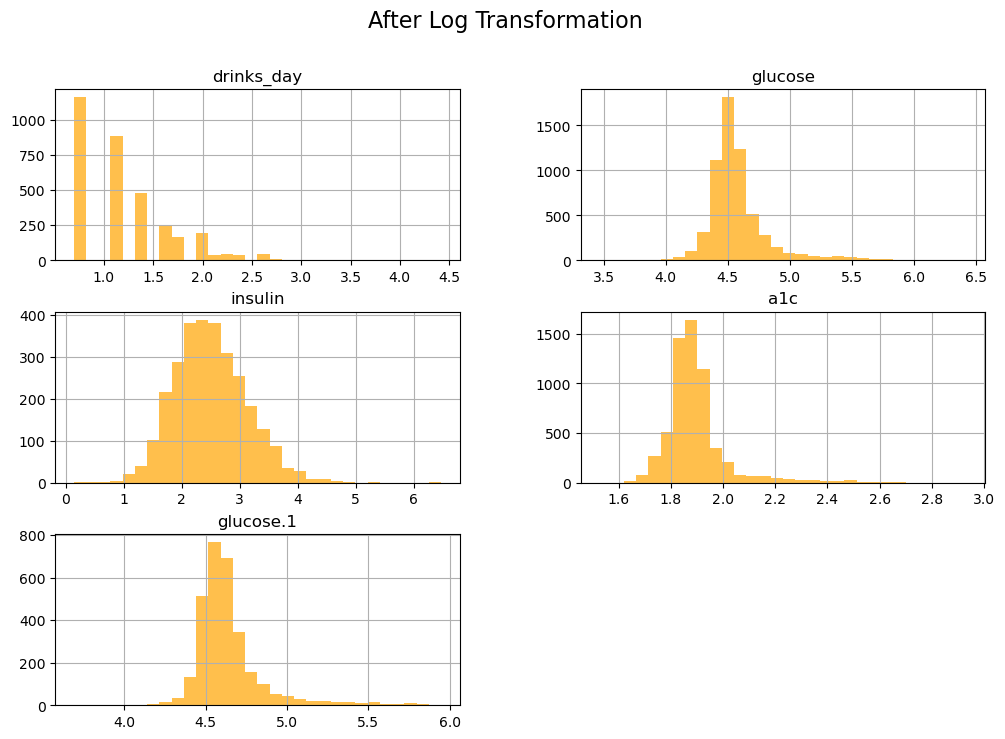

In [49]:
#diagram

data[skewed_columns].hist(bins=30, figsize=(12, 8), color='orange', alpha=0.7)
plt.suptitle('After Log Transformation', fontsize=16)
plt.show()

In [51]:
# Kurtosis for numerical columns
data.select_dtypes(include=[np.number]).kurt()


gender         -2.000493
age            -1.145363
race           -0.296820
drinks_day      1.321150
weight_kg       0.945746
height_cm       0.718612
bmi             2.337953
sys_bp          2.245329
dia_bp          3.589401
t_chol          1.719519
glucose         8.287632
ldh            10.692223
t_bilirubin    13.097766
a1c            10.793187
glucose.1       8.478559
insulin         0.891320
hdl             3.095932
ldl_chol        1.092191
dtype: float64

In [53]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(data[['glucose', 'glucose.1', 'a1c']]))

# Set a threshold to identify outliers (e.g., Z-score > 3)
outliers = (z_scores > 3).all(axis=1)

# Remove or handle outliers
data_cleaned = data[~outliers]  # Removing outliers


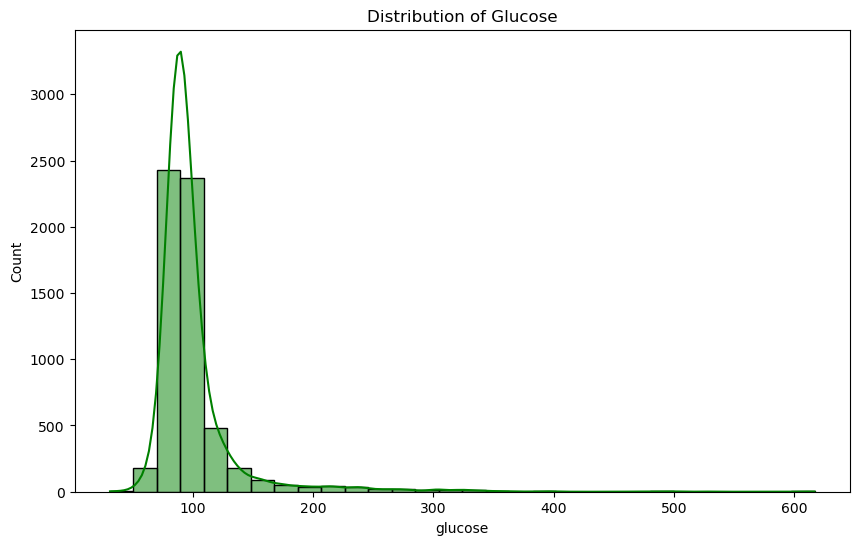

In [139]:
# Plot histograms to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['glucose'], kde=True, color='green', bins=30)
plt.title('Distribution of Glucose')
plt.show()

In [55]:
data.shape

(7821, 29)

In [57]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['asthma', 'chf', 'cad', 'mi', 'cva', 'copd', 'cancer', 'diabetes',
       'depression', 'hypertension', 'smoker'],
      dtype='object')


In [59]:
for col in non_numeric_columns:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'asthma': ['No' 'Yes' 'Unknown']
Unique values in 'chf': ['No' 'Unknown' 'Yes']
Unique values in 'cad': ['No' 'Unknown' 'Yes']
Unique values in 'mi': ['No' 'Unknown' 'Yes']
Unique values in 'cva': ['No' 'Unknown' 'Yes']
Unique values in 'copd': ['No' 'Unknown' 'Yes']
Unique values in 'cancer': ['No' 'Unknown' 'Yes']
Unique values in 'diabetes': ['Type 2' 'Type 1' 'Gestational' 'Unknown']
Unique values in 'depression': ['Mild' 'No' 'Severe' 'Moderate' 'Unknown']
Unique values in 'hypertension': ['Unknown' 'No' 'Yes']
Unique values in 'smoker': ['Yes' 'Unknown' 'No']


In [63]:
# Mapping categorical values to numeric values
binary_map = {'1': 1, '2': 2, 'blank': 0} 
for col in non_numeric_columns:
    data[col] = data[col].replace(binary_map)

In [65]:
# Mapping multi-class categorical values to numeric labels
diabetes_map = {'1': 1, '2': 2, '3': 3, 'blank': 0}  

data['diabetes'] = data['diabetes'].replace(diabetes_map)


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [69]:
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)


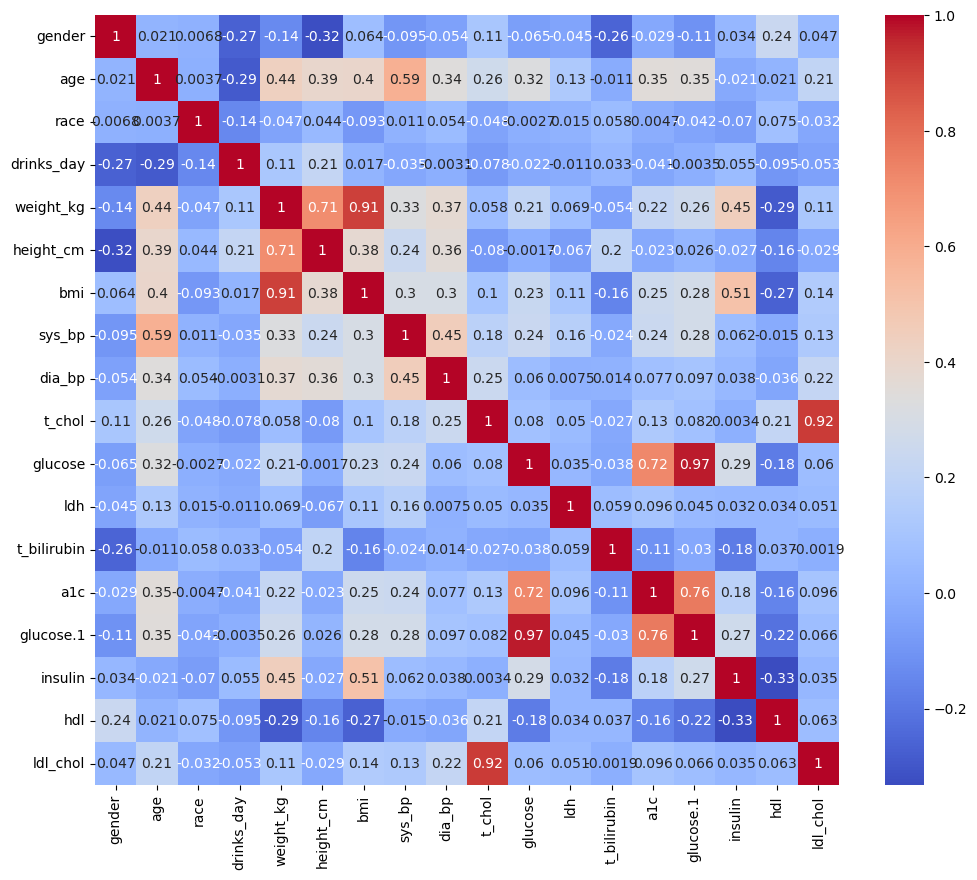

In [165]:
# Select only numeric columns after encoding
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7821 entries, 0 to 7820
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7821 non-null   int64  
 1   age             7785 non-null   float64
 2   race            7821 non-null   int64  
 3   drinks_day      3329 non-null   float64
 4   weight_kg       7732 non-null   float64
 5   height_cm       7732 non-null   float64
 6   bmi             7719 non-null   float64
 7   sys_bp          6756 non-null   float64
 8   dia_bp          6756 non-null   float64
 9   t_chol          5974 non-null   float64
 10  glucose         5976 non-null   float64
 11  ldh             5969 non-null   float64
 12  t_bilirubin     5969 non-null   float64
 13  a1c             6145 non-null   float64
 14  glucose.1       3033 non-null   float64
 15  insulin         2881 non-null   float64
 16  hdl             6989 non-null   float64
 17  ldl_chol        2942 non-null   f

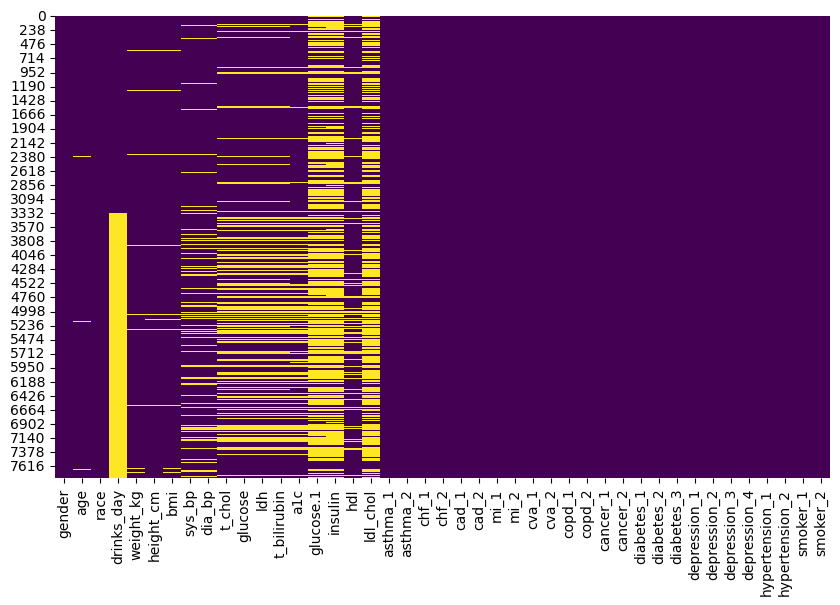

In [73]:
# Check missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()


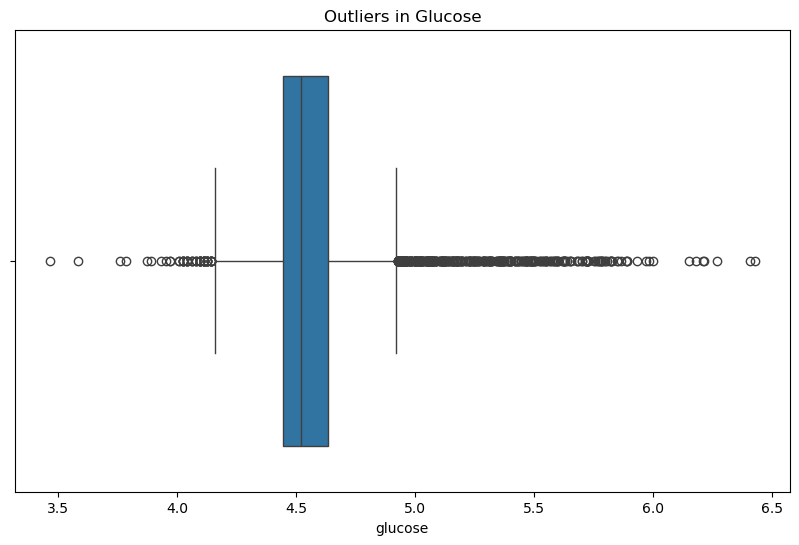

In [75]:
# Boxplot to visualize outliers in key numerical features like 'glucose', 'insulin', etc.
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['glucose'])
plt.title('Outliers in Glucose')
plt.show()


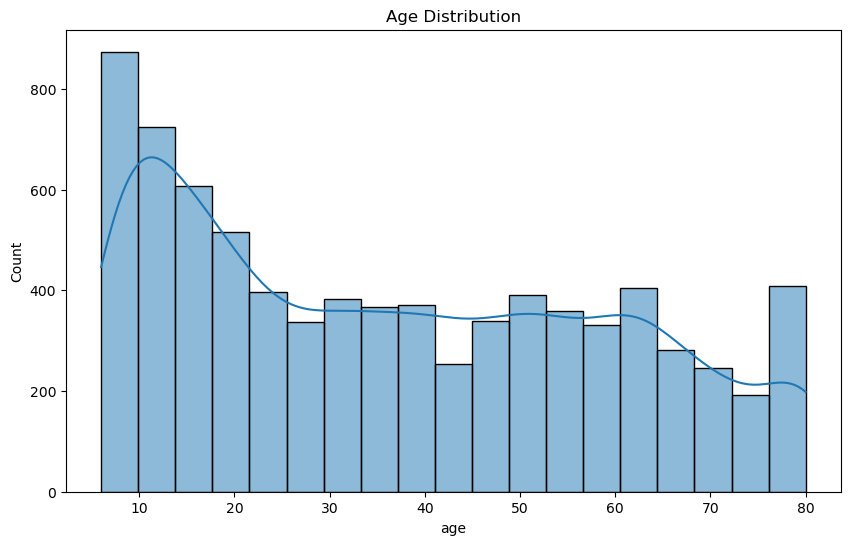

In [77]:
# Distribution plot for a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


In [79]:
print(data.columns)

Index(['gender', 'age', 'race', 'drinks_day', 'weight_kg', 'height_cm', 'bmi',
       'sys_bp', 'dia_bp', 't_chol', 'glucose', 'ldh', 't_bilirubin', 'a1c',
       'glucose.1', 'insulin', 'hdl', 'ldl_chol', 'asthma_1', 'asthma_2',
       'chf_1', 'chf_2', 'cad_1', 'cad_2', 'mi_1', 'mi_2', 'cva_1', 'cva_2',
       'copd_1', 'copd_2', 'cancer_1', 'cancer_2', 'diabetes_1', 'diabetes_2',
       'diabetes_3', 'depression_1', 'depression_2', 'depression_3',
       'depression_4', 'hypertension_1', 'hypertension_2', 'smoker_1',
       'smoker_2'],
      dtype='object')


In [81]:
# Combine the three diabetes columns into one
data['diabetes'] = data[['diabetes_1', 'diabetes_2', 'diabetes_3']].idxmax(axis=1)

# Map the columns to diabetes types
diabetes_map = {
    'diabetes_1': 'Type 1',
    'diabetes_2': 'Type 2',
    'diabetes_3': 'Gestational'
}

# Apply the mapping
data['diabetes'] = data['diabetes'].map(diabetes_map)

# Checking data
print(data[['diabetes', 'diabetes_1', 'diabetes_2', 'diabetes_3']].head())


  diabetes  diabetes_1  diabetes_2  diabetes_3
0   Type 2       False        True       False
1   Type 2       False        True       False
2   Type 2       False        True       False
3   Type 1        True       False       False
4   Type 2       False        True       False


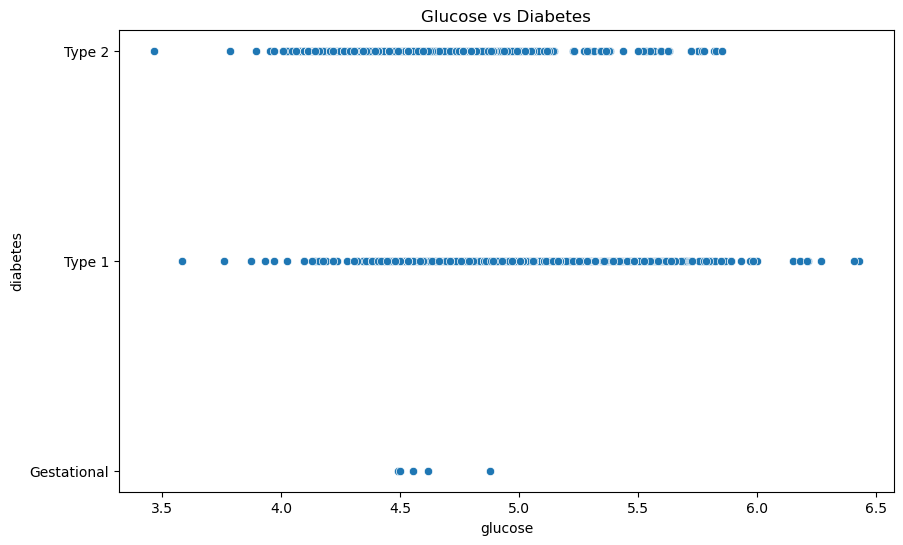

In [83]:
# Scatter plot for glucose vs diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['glucose'], y=data['diabetes'])
plt.title('Glucose vs Diabetes')
plt.show()


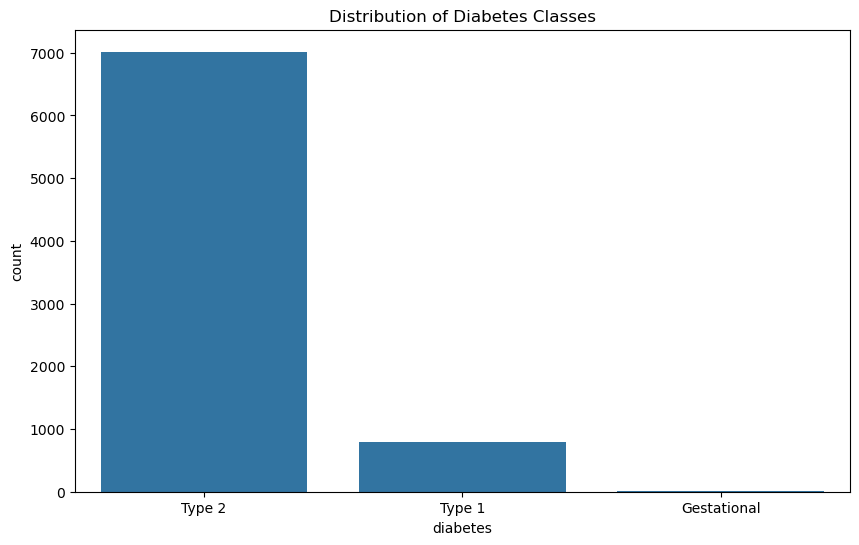

In [85]:
# Check distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=data['diabetes'])
plt.title('Distribution of Diabetes Classes')
plt.show()


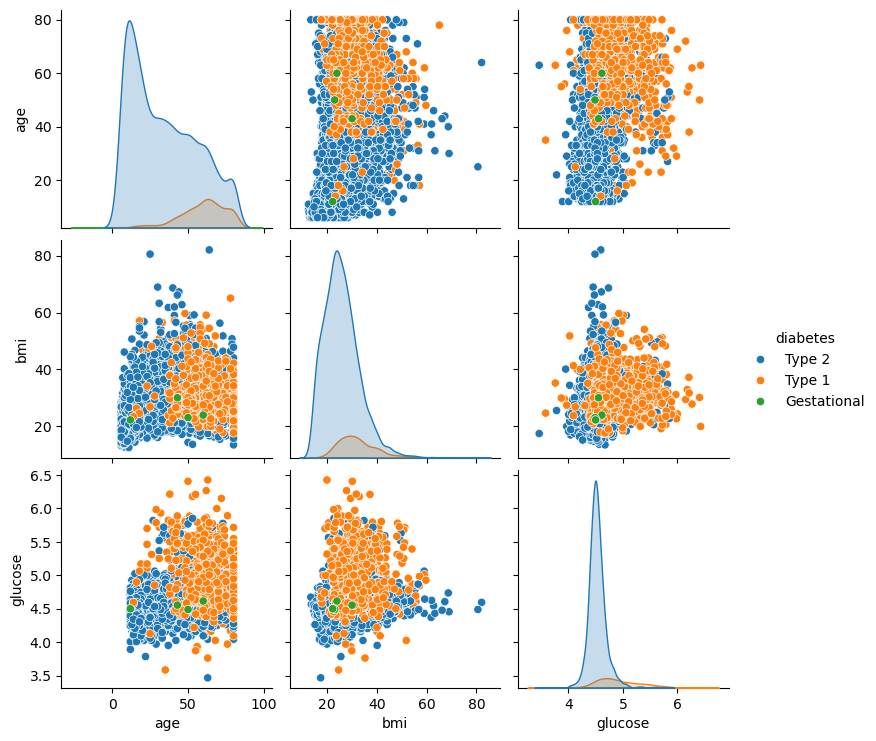

In [87]:
# Pairplot of selected features vs target
sns.pairplot(data[['age', 'bmi', 'glucose', 'diabetes']], hue='diabetes')
plt.show()


In [284]:
# Step 1: Select numerical columns from the data DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Step 2: Apply Standard Scaler for numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Print first few rows of scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)
print("First few rows of scaled data:")
print(scaled_df.head())

# Step 3: Train-test split
X = data.drop('diabetes', axis=1)  # Features (excluding target column)
y = data['diabetes']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


First few rows of scaled data:
     gender       age      race  drinks_day  weight_kg  height_cm       bmi  \
0 -1.002176 -0.343791  1.613210    6.327612   3.748303   1.576903  2.943810   
1 -1.002176 -0.786239 -0.297672    5.846827   0.718519   2.399789 -0.520224   
2  0.997829 -0.741994 -0.297672    4.390626   0.167299   0.804657 -0.211415   
3 -1.002176  0.275636  2.250170    4.390626   1.204209   1.235089  0.634454   
4 -1.002176 -0.741994 -1.571593    3.967550   0.772484   0.519812  0.688160   

     sys_bp    dia_bp    t_chol   glucose       ldh  t_bilirubin       a1c  \
0 -0.489074  0.867572  0.723601  0.802541  1.456807     0.319103  0.836037   
1 -0.702412  0.073104 -0.111689 -0.133651 -0.962138     0.319103 -0.779976   
2 -0.382405 -0.853774 -0.493536 -1.192113  0.460771    -0.028411 -0.779976   
3  0.577617 -0.059307  0.246292  3.348815 -0.713129    -0.028411  1.142258   
4 -0.809081 -0.191718  0.055369 -0.262412 -0.215111    -0.723440 -0.404021   

   glucose.1   insulin   

In [288]:
missing_values = data.isnull().sum()
print(missing_values)

gender               0
age                 36
race                 0
drinks_day        4492
weight_kg           89
height_cm           89
bmi                102
sys_bp            1065
dia_bp            1065
t_chol            1847
glucose           1845
ldh               1852
t_bilirubin       1852
a1c               1676
glucose.1         4788
insulin           4940
hdl                832
ldl_chol          4879
asthma_1             0
asthma_2             0
chf_1                0
chf_2                0
cad_1                0
cad_2                0
mi_1                 0
mi_2                 0
cva_1                0
cva_2                0
copd_1               0
copd_2               0
cancer_1             0
cancer_2             0
diabetes_1           0
diabetes_2           0
diabetes_3           0
depression_1         0
depression_2         0
depression_3         0
depression_4         0
hypertension_1       0
hypertension_2       0
smoker_1             0
smoker_2             0
diabetes   

In [286]:
# Filling missing values with the mean
X_train_imputed = X_train.fillna(X_train.mean())
X_test_imputed = X_test.fillna(X_test.mean())

In [296]:
# Check unique values in y_train
print(y_train.unique())

['Type 2' 'Type 1' 'Gestational']


In [324]:
# Map the categorical values to numeric values (adjust based on your dataset)
# Binary classification (diabetes vs no diabetes)
y_train_encoded = y_train.map({'Type 1': 0, 'Type 2': 1, 'Gestational': 1})
y_test_encoded = y_test.map({'Type 1': 0, 'Type 2': 1, 'Gestational': 1})

In [326]:
# Standard scaling for numerical columns
scaler = StandardScaler()
numeric_columns = X_train_imputed.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = scaler.fit_transform(X_train_imputed[numeric_columns])
X_test_scaled = scaler.transform(X_test_imputed[numeric_columns])

In [328]:
# Checking unique values after encoding
print("Unique values in y_train:", y_train_encoded.unique())
print("Unique values in y_test:", y_test_encoded.unique())

Unique values in y_train: [1 0]
Unique values in y_test: [1 0]


In [415]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [417]:
#Logistic regression model

log_reg = LogisticRegression(random_state=42)

In [419]:
# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train_encoded)

LogisticRegression(random_state=42)

In [421]:
# Making predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Probability scores for ROC curve (probability of class 1)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

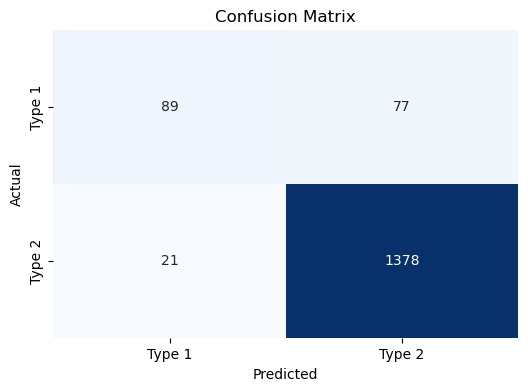

Accuracy: 0.9374
Precision: 0.9471
Recall: 0.9850
F1-Score: 0.9657


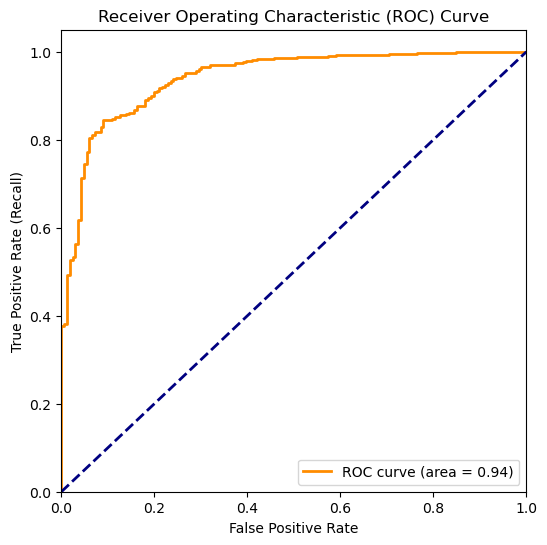

In [423]:
#Evaluating the model

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Type 1", "Type 2"], yticklabels=["Type 1", "Type 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Accuracy

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Precision, recall and F1 score

precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [366]:
#Decision Tree Classsifier 

dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [368]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

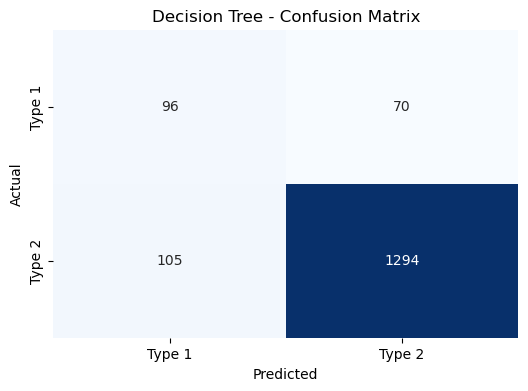

Accuracy: 0.8882
Precision: 0.9487
Recall: 0.9249
F1-Score: 0.9367


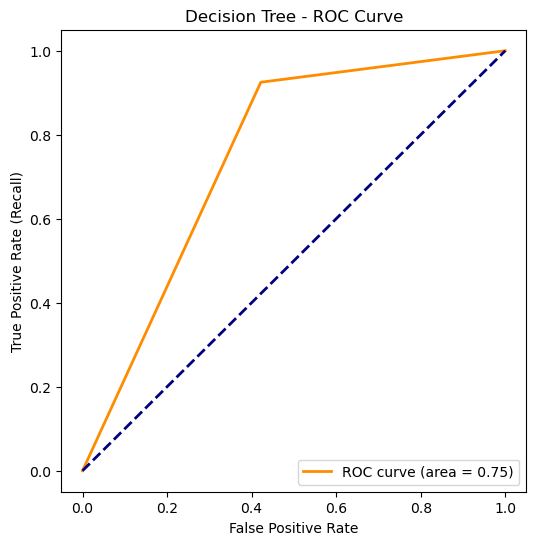

In [374]:
# Evaluating the model

# Confusion Matrix
cm_dt = confusion_matrix(y_test_encoded, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Type 1", "Type 2"], yticklabels=["Type 1", "Type 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Accuracy, Precision, Recall, F1-Score
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt)
recall_dt = recall_score(y_test_encoded, y_pred_dt)
f1_dt = f1_score(y_test_encoded, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Decision Tree - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [387]:
# MLP Classifier 

mlp_model = MLPClassifier(random_state=42,max_iter=1000)

# Train the model
mlp_model.fit(X_train_scaled, y_train_encoded)

MLPClassifier(max_iter=1000, random_state=42)

In [384]:
# Make predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_prob_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

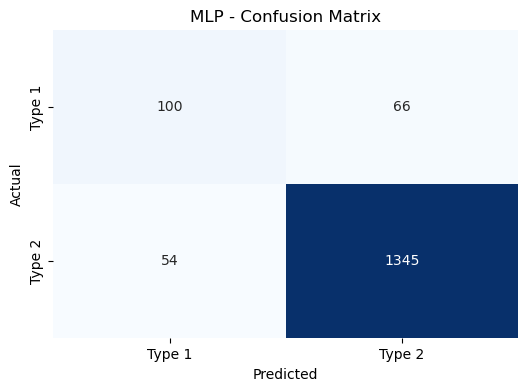

Accuracy: 0.9233
Precision: 0.9532
Recall: 0.9614
F1-Score: 0.9573


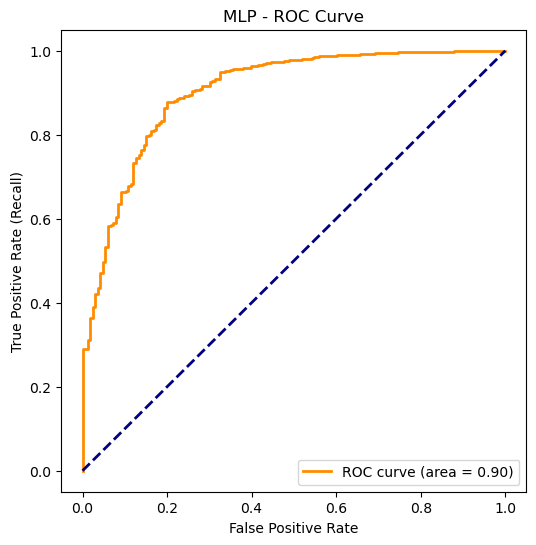

In [397]:
#Evaluate the model

# Confusion Matrix
cm_mlp = confusion_matrix(y_test_encoded, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Type 1", "Type 2"], yticklabels=["Type 1", "Type 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP - Confusion Matrix")
plt.show()

# Accuracy, Precision, Recall, F1-Score
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
precision_mlp = precision_score(y_test_encoded, y_pred_mlp)
recall_mlp = recall_score(y_test_encoded, y_pred_mlp)
f1_mlp = f1_score(y_test_encoded, y_pred_mlp)

print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")

# ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_encoded, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_mlp:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("MLP - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [399]:
# Naive Bayes Classifier 

nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train_encoded)

GaussianNB()

In [401]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

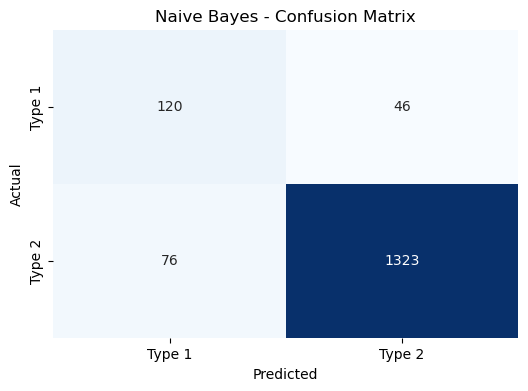

Accuracy: 0.9220
Precision: 0.9664
Recall: 0.9457
F1-Score: 0.9559


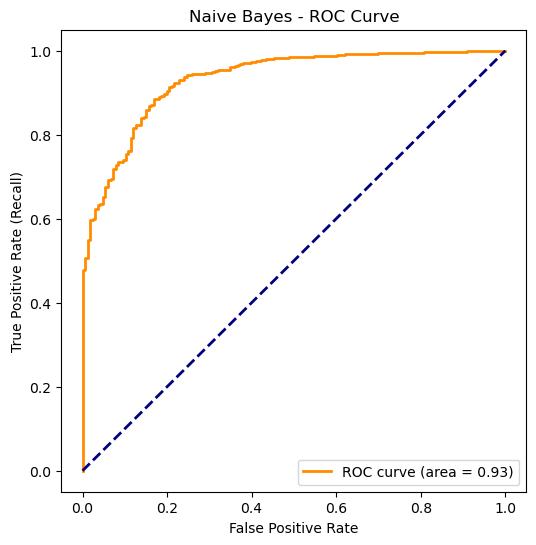

In [407]:
#Evaluate the model

# Confusion Matrix
cm_nb = confusion_matrix(y_test_encoded, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Type 1", "Type 2"], yticklabels=["Type 1", "Type 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# Accuracy, Precision, Recall, F1-Score
accuracy_nb = accuracy_score(y_test_encoded, y_pred_nb)
precision_nb = precision_score(y_test_encoded, y_pred_nb)
recall_nb = recall_score(y_test_encoded, y_pred_nb)
f1_nb = f1_score(y_test_encoded, y_pred_nb)

print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_encoded, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(6, 6))
plt.plot(fpr_nb, tpr_nb, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Naive Bayes - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [409]:
#Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(random_state=42)

In [411]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

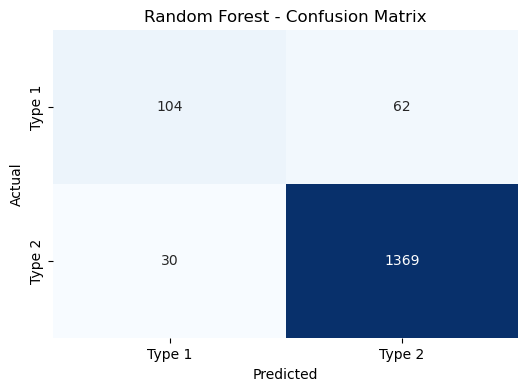

Accuracy: 0.9412
Precision: 0.9567
Recall: 0.9786
F1-Score: 0.9675


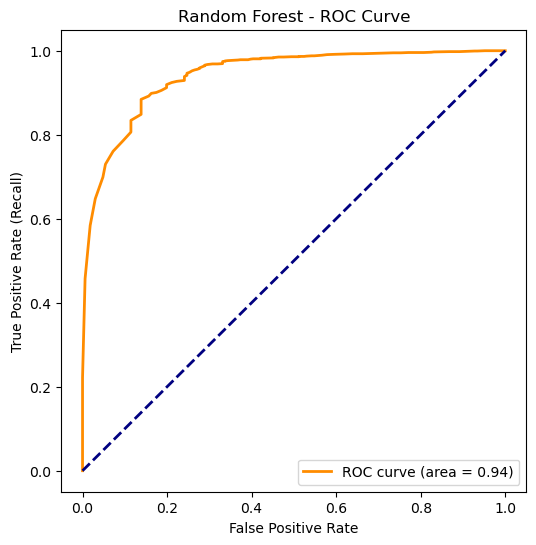

In [413]:
#Evaluate the Model

# Confusion Matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Type 1", "Type 2"], yticklabels=["Type 1", "Type 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Accuracy, Precision, Recall, F1-Score
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf)
recall_rf = recall_score(y_test_encoded, y_pred_rf)
f1_rf = f1_score(y_test_encoded, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Random Forest - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [441]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [443]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [445]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [447]:
# Fit the model
random_search.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [449]:
# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)

# Best cross-validation score
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters found:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best cross-validation score:  0.9422959044078256


In [455]:
# Best estimator (model)
best_rf_model = random_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_rf_model.predict(X_test_scaled)

In [457]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='binary')
recall = recall_score(y_test_encoded, y_pred, average='binary')
f1 = f1_score(y_test_encoded, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Print results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix: \n", conf_matrix)


Accuracy:  0.9431309904153354
Precision:  0.9593267882187938
Recall:  0.9778413152251608
F1-Score:  0.968495575221239
Confusion Matrix: 
 [[ 108   58]
 [  31 1368]]


In [469]:
# cross-validation results
cv_results = random_search.cv_results_

# Display a DataFrame with the results for easier viewing
results_df = pd.DataFrame(cv_results)
print(results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False))

print("Mean test scores: ", cv_results['mean_test_score'])

   param_n_estimators param_max_depth  mean_test_score
79                400              10         0.942296
83                300              30         0.942296
97                 50            None         0.942296
55                100              10         0.942296
81                300            None         0.942136
..                ...             ...              ...
98                400            None         0.939578
16                200              40         0.939578
43                100              30         0.939258
14                200            None         0.939099
65                 50              40         0.938779

[100 rows x 3 columns]
Mean test scores:  [0.94213611 0.94069741 0.94101677 0.94101708 0.94005777 0.94117695
 0.94005762 0.94085683 0.94149662 0.94021749 0.93989782 0.94197624
 0.94101693 0.94197616 0.93909854 0.94149662 0.93957785 0.94133698
 0.94117657 0.94021772 0.94149631 0.9411768  0.94037767 0.94085721
 0.94117642 0.94117688 0.9408